In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.feature_selection import chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import random
warnings.filterwarnings("ignore")

In [33]:
def set_seed(seed = 42):
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

In [34]:
contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280377 entries, 0 to 4280376
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  APPLY_CONTRACT_TIME    object 
 15  APPROVE_CONTRACT_TIME  object 
 16  SIGN_CONTRACT_TIME     object 
 17  APPLY_EMPLOYEE         int64  
 18  SIGN_EMPLOYEE          int64  
 19  FIRST_DUE              int64  
 20  SECOND_DUE             int64  
 21  THIRD_DUE              int64  
 22  FOURTH_DUE        

In [35]:
contract_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,APPLY_CONTRACT_TIME,APPROVE_CONTRACT_TIME,SIGN_CONTRACT_TIME,APPLY_EMPLOYEE,SIGN_EMPLOYEE,FIRST_DUE,SECOND_DUE,THIRD_DUE,FOURTH_DUE,FLAG_INS
0,199270422,3489209,XNA,0,9000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,2020-01-21 11:05:16,NaN,NaN,-1,-1,0,0,0,0,0
1,199467152,62216381,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2020-01-23 21:16:52,2020-01-23 21:19:41,2020-01-23 21:31:32,-1,-1,0,0,0,0,1
2,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2020-03-06 21:25:19,2020-03-06 21:28:01,2020-03-06 21:30:53,23074,23074,0,0,0,0,1
3,203031337,38026388,Elementary (primary) school,0,7000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,2020-03-10 19:33:37,2020-03-10 19:36:53,2020-03-10 19:37:27,-1,-1,0,0,0,0,1
4,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,2019-01-31 19:09:53,2019-01-31 19:11:02,2019-01-31 21:46:12,20815,31089,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280372,342935768,77354359,High school education,0,15000000.0,0,Employed person,ADMINISTRATIVE,Active,Cash Loan,...,2025-06-04 11:15:56,2025-06-04 11:19:56,2025-06-04 11:25:57,-1,-1,0,0,0,0,0
4280373,342935857,20795524,High school education,0,12000000.0,0,Employed person,WORKER,Active,Credit Card,...,2025-06-04 16:17:23,2025-06-04 16:18:00,2025-06-04 16:18:25,-1,-1,0,0,0,0,1
4280374,342935889,14994675,High school education,0,50000000.0,0,Employed person,OTHER,Active,Cash Loan,...,2025-06-04 13:41:32,2025-06-04 14:20:52,2025-06-04 14:27:19,33883,33883,0,0,0,0,1
4280375,342936178,67269333,High school education,0,20000000.0,0,Self-employed person / business owner,OTHER,Active,Cash Loan,...,2025-06-04 11:43:25,2025-06-04 11:46:40,2025-06-04 11:47:02,-1,-1,0,0,0,0,0


In [36]:
customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')
customer_df

,SKP_CLIENT,NAME_GENDER,NAME_EDUCATION_TYPE,DATE_BIRTH,CNT_CHILDREN,NAME_SALARY_FREQUENCY,CNT_PERSON_DEPENDENT,AVG_SESSION_PER_WEEK_2025,AGE_CLIENT,CLIENT_PROVINCE
0,676,Female,High school education,1966-03-18,0.0,XNA,-1.0,0.0,59,Long An
1,1470,Male,High school education,1967-12-27,1.0,XNA,-1.0,0.0,57,TP Ho Chi Minh
2,7123,Male,Junior school education,1972-10-03,2.0,XNA,6.0,0.0,52,Dak Lak
3,10711,Female,Elementary (primary) school,1978-01-01,1.0,XNA,1.0,0.0,47,Tien Giang
4,12407,Male,High school education,1986-03-14,1.0,XNA,-1.0,0.0,39,Gia Lai
...,...,...,...,...,...,...,...,...,...,...
1000523,126809534,Male,XNA,1990-04-02,0.0,XNA,-1.0,0.0,35,0
1000524,127462754,Male,XNA,2005-04-30,-1.0,XNA,-1.0,0.0,20,0
1000525,126394510,Male,XNA,1995-07-24,0.0,XNA,-1.0,0.0,29,0
1000526,118415150,Female,XNA,2000-05-09,-1.0,XNA,-1.0,0.0,25,0


In [37]:
customer_df.drop(columns=['NAME_EDUCATION_TYPE', 'DATE_BIRTH', 'CNT_CHILDREN'], inplace=True)
customer_df

,SKP_CLIENT,NAME_GENDER,NAME_SALARY_FREQUENCY,CNT_PERSON_DEPENDENT,AVG_SESSION_PER_WEEK_2025,AGE_CLIENT,CLIENT_PROVINCE
0,676,Female,XNA,-1.0,0.0,59,Long An
1,1470,Male,XNA,-1.0,0.0,57,TP Ho Chi Minh
2,7123,Male,XNA,6.0,0.0,52,Dak Lak
3,10711,Female,XNA,1.0,0.0,47,Tien Giang
4,12407,Male,XNA,-1.0,0.0,39,Gia Lai
...,...,...,...,...,...,...,...
1000523,126809534,Male,XNA,-1.0,0.0,35,0
1000524,127462754,Male,XNA,-1.0,0.0,20,0
1000525,126394510,Male,XNA,-1.0,0.0,29,0
1000526,118415150,Female,XNA,-1.0,0.0,25,0


In [38]:
customer_df['CLIENT_PROVINCE'] = customer_df['CLIENT_PROVINCE'].replace({0: '0'})
customer_df['CLIENT_PROVINCE'].unique()

array(['Long An', 'TP Ho Chi Minh', 'Dak Lak', 'Tien Giang', 'Gia Lai',
       'Quang Ninh', 'Dong Thap', 'Soc Trang', 'Quang Ngai', 'Da Nang',
       'Nghe An', 'An Giang', 'Bac Lieu', 'Binh Duong', 'Dong Nai',
       'Thua Thien - Hue', 'Yen Bai', 'Bac Giang', 'Ba Ria - Vung Tau',
       'Ha Noi', 'Hai Phong', 'Binh Phuoc', 'Hung Yen', 'Tay Ninh',
       'Vinh Long', 'Binh Thuan', 'Quang Tri', 'Ninh Thuan', 'Vinh Phuc',
       'Khanh Hoa', 'Lam Dong', 'Can Tho', 'Thanh Hoa', 'Kien Giang',
       'Quang Binh', 'Quang Nam', 'Ca Mau', 'Binh Dinh', 'Kon Tum',
       'Thai Nguyen', 'Bac Ninh', 'Son La', 'Thai Binh', 'Ben Tre',
       'Phu Tho', 'Phu Yen', 'Dak Nong', 'Lang Son', 'Nam Dinh',
       'Ha Tinh', 'Tra Vinh', 'Ninh Binh', 'Hau Giang', 'Hai Duong',
       'Ha Nam', 'Hoa Binh', 'Dien Bien', 'Bac Kan', 'Lao Cai',
       'Tuyen Quang', 'Cao Bang', 'Ha Giang', 'Lai Chau', '0'],
      dtype=object)

In [39]:
employee_df = pd.read_csv(r'filled_data/EMPLOYEE.csv')
employee_df

,CODE_EMPLOYEE,HIRING_DATE,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER
0,46911,2021-01-04,2021-10-01,115169,0,2001-11-28,0,270,19,23,42,0
1,46945,2021-01-11,2021-07-26,35377,0,1999-12-23,0,196,21,25,19,0
2,47297,2021-02-22,2024-03-13,115717,0,1999-06-10,0,1115,21,26,52,0
3,47428,2021-03-01,2021-04-11,2101,0,1998-10-10,0,41,22,26,11,0
4,47435,2021-03-01,2021-11-11,115642,0,1988-02-18,0,255,33,37,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11378,118286,2013-07-24,2021-09-19,120745,0,1992-11-05,0,2979,20,32,54,0
11379,120002,2013-10-14,2022-06-01,17466,0,1992-05-01,0,3152,21,33,20,0
11380,120825,2013-11-27,2021-08-15,23979,0,1991-03-26,0,2818,22,34,52,0
11381,121209,2013-12-16,NaN,16010,1,1988-03-11,0,4195,25,37,20,0


In [40]:
employee_df.drop(columns=['HIRING_DATE', 'LEAVING_DATE', 'MANAGER_CODE_EMPLOYEE', 'BIRTH_DATE'], inplace=True)
employee_df

,CODE_EMPLOYEE,GENDER,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER
0,46911,0,0,270,19,23,42,0
1,46945,0,0,196,21,25,19,0
2,47297,0,0,1115,21,26,52,0
3,47428,0,0,41,22,26,11,0
4,47435,0,0,255,33,37,52,0
...,...,...,...,...,...,...,...,...
11378,118286,0,0,2979,20,32,54,0
11379,120002,0,0,3152,21,33,20,0
11380,120825,0,0,2818,22,34,52,0
11381,121209,1,0,4195,25,37,20,0


In [41]:
final_df = contract_df.merge(customer_df, on='SKP_CLIENT', how='inner')
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,SECOND_DUE,THIRD_DUE,FOURTH_DUE,FLAG_INS,NAME_GENDER,NAME_SALARY_FREQUENCY,CNT_PERSON_DEPENDENT,AVG_SESSION_PER_WEEK_2025,AGE_CLIENT,CLIENT_PROVINCE
0,199270422,3489209,XNA,0,9000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,0,0,0,0,Male,Irregular salary frequency,-1.0,0.00,44,TP Ho Chi Minh
1,199467152,62216381,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,0,0,0,1,Male,XNA,-1.0,0.00,52,Khanh Hoa
2,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,0,0,0,1,Female,XNA,-1.0,0.00,32,Phu Tho
3,203031337,38026388,Elementary (primary) school,0,7000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,0,0,0,1,Female,XNA,-1.0,0.00,50,TP Ho Chi Minh
4,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,0,0,0,1,Female,XNA,-1.0,0.00,33,Khanh Hoa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280372,342935768,77354359,High school education,0,15000000.0,0,Employed person,ADMINISTRATIVE,Active,Cash Loan,...,0,0,0,0,Male,XNA,-1.0,0.00,53,Khanh Hoa
4280373,342935857,20795524,High school education,0,12000000.0,0,Employed person,WORKER,Active,Credit Card,...,0,0,0,1,Male,XNA,-1.0,0.00,31,Thanh Hoa
4280374,342935889,14994675,High school education,0,50000000.0,0,Employed person,OTHER,Active,Cash Loan,...,0,0,0,1,Male,XNA,-1.0,0.00,49,TP Ho Chi Minh
4280375,342936178,67269333,High school education,0,20000000.0,0,Self-employed person / business owner,OTHER,Active,Cash Loan,...,0,0,0,0,Male,XNA,-1.0,0.00,31,TP Ho Chi Minh


In [42]:
final_df = final_df.merge(employee_df, left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE', how='inner')
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,AGE_CLIENT,CLIENT_PROVINCE,CODE_EMPLOYEE,GENDER,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER
0,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,32,Phu Tho,23074,0,2,2969,30,40,43,0
1,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,33,Khanh Hoa,20815,0,1,2800,22,32,31,1
2,335925533,126826775,XNA,0,2000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,20,0,37020,0,1,2633,28,35,52,0
3,163357328,38084937,Junior school education,0,5000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,45,Thanh Hoa,31181,0,0,1473,22,30,56,0
4,193688464,37761042,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,30,Ha Noi,30150,0,0,1624,24,32,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,99124783,Junior school education,1,25000000.0,0,Employed person,SALESMAN,Signed,Cash Loan,...,26,Kien Giang,49032,0,3,1458,33,37,38,0
900897,342934791,6409762,Elementary (primary) school,2,15000000.0,0,Self-employed person / business owner,OTHER,Signed,Cash Loan,...,44,Bac Lieu,50676,1,3,1311,19,23,5,0
900898,342935412,37676700,Elementary (primary) school,1,15000000.0,0,Employed person,WORKER,Signed,Two-wheelers,...,28,Ben Tre,59017,1,0,261,24,24,52,0
900899,342935765,7514929,Junior school education,0,20000000.0,0,Self-employed person / business owner,ENGINEER,Approved,Cash Loan,...,34,TP Ho Chi Minh,58955,1,2,268,33,34,38,0


In [43]:
def target_feature(row):
    if row['NAME_CREDIT_STATUS'] in ['In Preprocess', 'In Process']:
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] in ['Approved', 'Signed', 'Active', 'Finished', 'Paid off', 'Written off', 'Sold']:
        return 'Approved'
    if row['NAME_CREDIT_STATUS'] == 'Rejected':
        return 'Rejected'
    if row['NAME_CREDIT_STATUS'] == 'Cancelled':
        if pd.notna(row['APPROVE_CONTRACT_TIME']):
            return 'Rejected'
        return 'Approved'

final_df['APPROVE'] = final_df.apply(target_feature, axis=1)
final_df = final_df[final_df['APPROVE'] != 'Processing']
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,CLIENT_PROVINCE,CODE_EMPLOYEE,GENDER,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,APPROVE
0,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,Phu Tho,23074,0,2,2969,30,40,43,0,Approved
1,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,Khanh Hoa,20815,0,1,2800,22,32,31,1,Approved
2,335925533,126826775,XNA,0,2000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,0,37020,0,1,2633,28,35,52,0,Rejected
3,163357328,38084937,Junior school education,0,5000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,Thanh Hoa,31181,0,0,1473,22,30,56,0,Approved
4,193688464,37761042,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,Ha Noi,30150,0,0,1624,24,32,30,0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,99124783,Junior school education,1,25000000.0,0,Employed person,SALESMAN,Signed,Cash Loan,...,Kien Giang,49032,0,3,1458,33,37,38,0,Approved
900897,342934791,6409762,Elementary (primary) school,2,15000000.0,0,Self-employed person / business owner,OTHER,Signed,Cash Loan,...,Bac Lieu,50676,1,3,1311,19,23,5,0,Approved
900898,342935412,37676700,Elementary (primary) school,1,15000000.0,0,Employed person,WORKER,Signed,Two-wheelers,...,Ben Tre,59017,1,0,261,24,24,52,0,Approved
900899,342935765,7514929,Junior school education,0,20000000.0,0,Self-employed person / business owner,ENGINEER,Approved,Cash Loan,...,TP Ho Chi Minh,58955,1,2,268,33,34,38,0,Approved


In [44]:
# dont use approve columns because model are predicting customer is approved or not
final_df.drop(columns=['SKP_CLIENT', 'APPLY_CONTRACT_TIME', 'APPROVE_CONTRACT_TIME', 'SIGN_CONTRACT_TIME', 'APPLY_EMPLOYEE', 'SIGN_EMPLOYEE', 'CODE_EMPLOYEE', 'NAME_CREDIT_STATUS'], inplace=True)
final_df

,SKP_CREDIT_CASE,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,PRODUCT,AMT_CREDIT,PAYMENT_NUM,...,AGE_CLIENT,CLIENT_PROVINCE,GENDER,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,APPROVE
0,202732373,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Consumer Durable,5593000.0,6.0,...,32,Phu Tho,0,2,2969,30,40,43,0,Approved
1,149179096,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Consumer Durable,3003000.0,4.0,...,33,Khanh Hoa,0,1,2800,22,32,31,1,Approved
2,335925533,XNA,0,2000000.0,0,XNA,XNA,Consumer Durable,6890000.0,8.0,...,20,0,0,1,2633,28,35,52,0,Rejected
3,163357328,Junior school education,0,5000000.0,0,Employed person,WORKER,Consumer Durable,3300000.0,6.0,...,45,Thanh Hoa,0,0,1473,22,30,56,0,Approved
4,193688464,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Consumer Durable,2895000.0,6.0,...,30,Ha Noi,0,0,1624,24,32,30,0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,Junior school education,1,25000000.0,0,Employed person,SALESMAN,Cash Loan,30000000.0,12.0,...,26,Kien Giang,0,3,1458,33,37,38,0,Approved
900897,342934791,Elementary (primary) school,2,15000000.0,0,Self-employed person / business owner,OTHER,Cash Loan,25000000.0,18.0,...,44,Bac Lieu,1,3,1311,19,23,5,0,Approved
900898,342935412,Elementary (primary) school,1,15000000.0,0,Employed person,WORKER,Two-wheelers,18000000.0,9.0,...,28,Ben Tre,1,0,261,24,24,52,0,Approved
900899,342935765,Junior school education,0,20000000.0,0,Self-employed person / business owner,ENGINEER,Cash Loan,61566000.0,39.0,...,34,TP Ho Chi Minh,1,2,268,33,34,38,0,Approved


In [45]:
fill_median = ['AMT_CREDIT', 'PAYMENT_NUM', 'INIT_PAY', 'ANNUITY', 'CNT_PERSON_DEPENDENT']

for col in fill_median:
    final_df[col] = final_df[col].replace(-1, np.nan)
    final_df[col] = final_df[col].fillna(final_df[col].median())

final_df

,SKP_CREDIT_CASE,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,PRODUCT,AMT_CREDIT,PAYMENT_NUM,...,AGE_CLIENT,CLIENT_PROVINCE,GENDER,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,APPROVE
0,202732373,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Consumer Durable,5593000.0,6.0,...,32,Phu Tho,0,2,2969,30,40,43,0,Approved
1,149179096,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Consumer Durable,3003000.0,4.0,...,33,Khanh Hoa,0,1,2800,22,32,31,1,Approved
2,335925533,XNA,0,2000000.0,0,XNA,XNA,Consumer Durable,6890000.0,8.0,...,20,0,0,1,2633,28,35,52,0,Rejected
3,163357328,Junior school education,0,5000000.0,0,Employed person,WORKER,Consumer Durable,3300000.0,6.0,...,45,Thanh Hoa,0,0,1473,22,30,56,0,Approved
4,193688464,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Consumer Durable,2895000.0,6.0,...,30,Ha Noi,0,0,1624,24,32,30,0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,Junior school education,1,25000000.0,0,Employed person,SALESMAN,Cash Loan,30000000.0,12.0,...,26,Kien Giang,0,3,1458,33,37,38,0,Approved
900897,342934791,Elementary (primary) school,2,15000000.0,0,Self-employed person / business owner,OTHER,Cash Loan,25000000.0,18.0,...,44,Bac Lieu,1,3,1311,19,23,5,0,Approved
900898,342935412,Elementary (primary) school,1,15000000.0,0,Employed person,WORKER,Two-wheelers,18000000.0,9.0,...,28,Ben Tre,1,0,261,24,24,52,0,Approved
900899,342935765,Junior school education,0,20000000.0,0,Self-employed person / business owner,ENGINEER,Cash Loan,61566000.0,39.0,...,34,TP Ho Chi Minh,1,2,268,33,34,38,0,Approved


In [46]:
numeric_columns = ['CNT_CHILDREN', 'AMT_INCOME_MAIN', 'AMT_INCOME_HOUSEHOLD', 'AMT_CREDIT', 'PAYMENT_NUM', 'INIT_PAY', 'ANNUITY', 'CNT_PERSON_DEPENDENT', 'AVG_SESSION_PER_WEEK_2025', 'AGE_CLIENT', 'WORKING_DAYS', 'AGE_EMPLOYEE_HIRED', 'AGE_EMPLOYEE']
category_columns = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_PROFESSION', 'PRODUCT', 'FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE', 'FLAG_INS', 'NAME_GENDER', 'NAME_SALARY_FREQUENCY', 'CLIENT_PROVINCE', 'GENDER', 'LEVEL_SA', 'SA_PROVINCE', 'FLAG_MANAGER']
target = 'APPROVE'
len(numeric_columns) + len(category_columns)

29

In [47]:
encode_cols = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_PROFESSION', 'PRODUCT', 'FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE', 'FLAG_INS', 'NAME_GENDER', 'NAME_SALARY_FREQUENCY', 'CLIENT_PROVINCE']
for col in encode_cols + [target]:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col].astype(str))
    print(f"Mapping for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

final_df

Mapping for NAME_EDUCATION_TYPE: {"Bachelor's degree": np.int64(0), 'Elementary (primary) school': np.int64(1), 'High school education': np.int64(2), 'Junior school education': np.int64(3), "Master's degree": np.int64(4), 'XNA': np.int64(5)}
Mapping for NAME_INCOME_TYPE: {'Employed person': np.int64(0), 'Person in household': np.int64(1), 'Retired person': np.int64(2), 'Self-employed person / business owner': np.int64(3), 'Student': np.int64(4), 'Unemployed': np.int64(5), 'XNA': np.int64(6)}
Mapping for CODE_PROFESSION: {'ADMINISTRATIVE': np.int64(0), 'ENGINEER': np.int64(1), 'FARMER': np.int64(2), 'OTHER': np.int64(3), 'SALESMAN': np.int64(4), 'SERVICES': np.int64(5), 'WORKER': np.int64(6), 'XNA': np.int64(7)}
Mapping for PRODUCT: {'Cash Loan': np.int64(0), 'Consumer Durable': np.int64(1), 'Credit Card': np.int64(2), 'GM Paylater': np.int64(3), 'Insurance': np.int64(4), 'Two-wheelers': np.int64(5), 'XNA': np.int64(6)}
Mapping for FIRST_DUE: {'0': np.int64(0), '1': np.int64(1)}
Mapping

,SKP_CREDIT_CASE,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,PRODUCT,AMT_CREDIT,PAYMENT_NUM,...,AGE_CLIENT,CLIENT_PROVINCE,GENDER,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,APPROVE
0,202732373,0,0,7000000.0,0,0,3,1,5593000.0,6.0,...,32,43,0,2,2969,30,40,43,0,0
1,149179096,1,1,4000000.0,0,0,4,1,3003000.0,4.0,...,33,31,0,1,2800,22,32,31,1,0
2,335925533,5,0,2000000.0,0,6,7,1,6890000.0,8.0,...,20,0,0,1,2633,28,35,52,0,1
3,163357328,3,0,5000000.0,0,0,6,1,3300000.0,6.0,...,45,56,0,0,1473,22,30,56,0,0
4,193688464,0,0,10000000.0,0,0,3,1,2895000.0,6.0,...,30,24,0,0,1624,24,32,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,3,1,25000000.0,0,0,4,0,30000000.0,12.0,...,26,32,0,3,1458,33,37,38,0,0
900897,342934791,1,2,15000000.0,0,3,3,0,25000000.0,18.0,...,44,5,1,3,1311,19,23,5,0,0
900898,342935412,1,1,15000000.0,0,0,6,5,18000000.0,9.0,...,28,7,1,0,261,24,24,52,0,0
900899,342935765,3,0,20000000.0,0,3,1,0,61566000.0,39.0,...,34,52,1,2,268,33,34,38,0,0


In [48]:
contract_train = pd.read_csv(r'data/contract_train.csv')
contract_train

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,SIGN_EMPLOYEE,TRANSAC,FIRST_DUE,SECOND_DUE,THIRD_DUE,FOURTH_DUE,AMT_BILLING,FLAG_INS,APPLY_EMPLOYEE_LEVEL,SIGN_EMPLOYEE_LEVEL
0,199270422,3489209,XNA,0,9000000.0,0,XNA,XNA,Rejected,CD,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
1,75118432,20003356,XNA,0,0.0,0,XNA,XNA,Finished,CD,...,0021864,NaN,0,0,0,0,NaN,1,NaN,NaN
2,65575692,16372633,XNA,0,0.0,0,XNA,XNA,Finished,CD,...,0020061,NaN,0,0,0,0,NaN,1,NaN,NaN
3,66901942,14990367,XNA,0,0.0,0,XNA,XNA,Finished,CD,...,0021770,NaN,0,0,0,0,NaN,1,NaN,NaN
4,78144853,19573302,XNA,0,0.0,0,XNA,XNA,Rejected,CD,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080563,195986329,20566159,Bachelor's degree,0,18000000.0,0,Employed person,ENGINEER,Active,CC,...,OpenAPI_User,2019-12-25 00:00:00,0,0,0,0,105000.0,0,NaN,NaN
4080564,117314500,4244312,Elementary (primary) school,1,7000000.0,0,Employed person,WORKER,Cancelled,CL,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
4080565,321433839,11854609,XNA,0,10000000.0,0,Employed person,OTHER,Finished,CL,...,00049441,NaN,0,0,0,0,NaN,0,NaN,WARRIOR
4080566,81343486,12603259,XNA,0,0.0,0,XNA,XNA,Finished,CD,...,0034562,NaN,0,0,0,0,NaN,1,NaN,NaN


In [49]:
id_train = contract_train['SKP_CREDIT_CASE'].unique()

In [50]:
contract_test = pd.read_csv(r'data/contract_test.csv')
contract_test

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,SIGN_EMPLOYEE,TRANSAC,FIRST_DUE,SECOND_DUE,THIRD_DUE,FOURTH_DUE,AMT_BILLING,FLAG_INS,APPLY_EMPLOYEE_LEVEL,SIGN_EMPLOYEE_LEVEL
0,338045289,124672475,Bachelor's degree,2,20000000.0,0,Self-employed person / business owner,SALESMAN,Active,CD,...,R00024476,NaN,0,0,0,0,NaN,0,NaN,NaN
1,340503500,41333404,High school education,2,12000000.0,0,Employed person,ADMINISTRATIVE,Active,CL,...,0036811,NaN,0,0,0,0,NaN,1,WARRIOR,WARRIOR
2,341035471,61151829,XNA,0,0.0,0,XNA,XNA,Active,CL,...,00057550,NaN,0,0,0,0,NaN,1,NaN,SENIOR
3,337265914,93196127,XNA,0,0.0,0,XNA,XNA,Active,TW,...,0021613,NaN,0,0,0,0,NaN,1,WARRIOR,WARRIOR
4,342091310,125545214,XNA,0,15000000.0,0,XNA,XNA,Rejected,CD,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290089,341008445,99001073,XNA,0,0.0,0,XNA,XNA,Cancelled,CL,...,109062,NaN,0,0,0,0,NaN,0,NaN,MASTER
290090,341022122,72511607,XNA,0,0.0,0,XNA,XNA,Active,CL,...,Koyal_User,NaN,0,0,0,0,NaN,1,NaN,NaN
290091,337510899,73169785,Bachelor's degree,0,20000000.0,0,Employed person,ADMINISTRATIVE,Rejected,CL,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
290092,337972038,20462917,XNA,0,0.0,0,XNA,XNA,Active,CL,...,Koyal_User,NaN,0,0,0,0,NaN,0,NaN,NaN


In [51]:
id_test = contract_test['SKP_CREDIT_CASE'].unique()

In [52]:
train = final_df[final_df['SKP_CREDIT_CASE'].isin(id_train)]
test = final_df[final_df['SKP_CREDIT_CASE'].isin(id_test)]
train.drop(columns=['SKP_CREDIT_CASE'], inplace=True)
test.drop(columns=['SKP_CREDIT_CASE'], inplace=True)
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (627760, 30), Test shape: (42974, 30)


In [53]:
# ANOVA test for numeric features
for col in numeric_columns:
    f_value, p_value = f_classif(train[col].values.reshape(-1, 1), train[target])
    if p_value[0] < 0.05:
        print(f"ANOVA test for {col}: F-value = {f_value[0]}, p-value = {p_value[0]} (significant)")
    else:
        print(f"ANOVA test for {col}: F-value = {f_value[0]}, p-value = {p_value[0]}")

ANOVA test for CNT_CHILDREN: F-value = 22624.29874173146, p-value = 0.0 (significant)
ANOVA test for AMT_INCOME_MAIN: F-value = 1.2838113589489248, p-value = 0.25719201110763423
ANOVA test for AMT_INCOME_HOUSEHOLD: F-value = nan, p-value = nan
ANOVA test for AMT_CREDIT: F-value = 5395.053625695995, p-value = 0.0 (significant)
ANOVA test for PAYMENT_NUM: F-value = 825.6021804483147, p-value = 1.922497004858644e-181 (significant)
ANOVA test for INIT_PAY: F-value = 3759.640135214083, p-value = 0.0 (significant)
ANOVA test for ANNUITY: F-value = 1425.9369436481013, p-value = 1.091293441804e-311 (significant)
ANOVA test for CNT_PERSON_DEPENDENT: F-value = 3.182287354722328, p-value = 0.07444093880601328
ANOVA test for AVG_SESSION_PER_WEEK_2025: F-value = 1862.637982889673, p-value = 0.0 (significant)
ANOVA test for AGE_CLIENT: F-value = 9135.435078543964, p-value = 0.0 (significant)
ANOVA test for WORKING_DAYS: F-value = 5529.334129706082, p-value = 0.0 (significant)
ANOVA test for AGE_EMPL

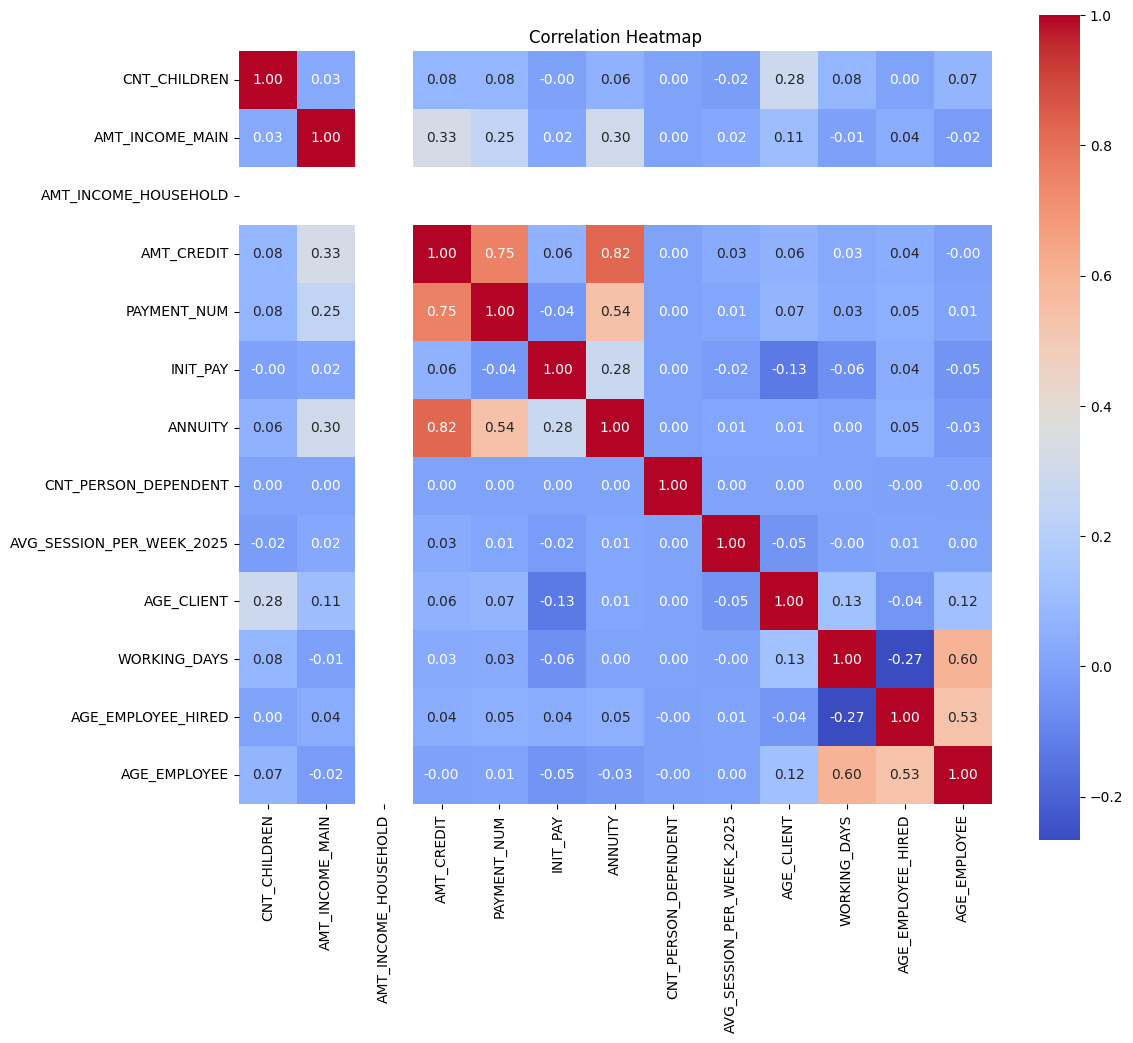

In [54]:
# Heatmap for correlation
plt.figure(figsize=(12, 12))
sns.heatmap(train[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()

In [55]:
# Chi-squared test for categorical features
for col in category_columns:
    chi2_stat, p_value = chi2(train[col].values.reshape(-1, 1), train[target])
    if p_value[0] < 0.05:
        print(f"Chi-squared test for {col}: Chi2-statistic = {chi2_stat[0]}, p-value = {p_value[0]} (significant)")
    else:
        print(f"Chi-squared test for {col}: Chi2-statistic = {chi2_stat[0]}, p-value = {p_value[0]}")

Chi-squared test for NAME_EDUCATION_TYPE: Chi2-statistic = 148614.61896331474, p-value = 0.0 (significant)
Chi-squared test for NAME_INCOME_TYPE: Chi2-statistic = 584724.0109500872, p-value = 0.0 (significant)
Chi-squared test for CODE_PROFESSION: Chi2-statistic = 88212.80496607584, p-value = 0.0 (significant)
Chi-squared test for PRODUCT: Chi2-statistic = 11.758149606361718, p-value = 0.0006057741800583633 (significant)
Chi-squared test for FIRST_DUE: Chi2-statistic = 870.3669574021719, p-value = 2.7152379510175755e-191 (significant)
Chi-squared test for SECOND_DUE: Chi2-statistic = 1501.2183562360833, p-value = 0.0 (significant)
Chi-squared test for THIRD_DUE: Chi2-statistic = 2053.733262687323, p-value = 0.0 (significant)
Chi-squared test for FOURTH_DUE: Chi2-statistic = 2537.270461244085, p-value = 0.0 (significant)
Chi-squared test for FLAG_INS: Chi2-statistic = 125203.69213223032, p-value = 0.0 (significant)
Chi-squared test for NAME_GENDER: Chi2-statistic = 1018.5015705608948, p

In [56]:
# All columns isnot significant and multicollinearity with each other (> 0.8)
remove_columns = ['AMT_INCOME_HOUSEHOLD', 'AMT_INCOME_MAIN', 'CNT_PERSON_DEPENDENT', 'ANNUITY']
train_cols = [x for x in numeric_columns + category_columns if x not in remove_columns]
X_train = train[train_cols]
X_test = test[train_cols]
Y_train = train[target]
Y_test = test[target]
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")

X_train shape: (627760, 25), X_test shape: (42974, 25), Y_train shape: (627760,), Y_test shape: (42974,)


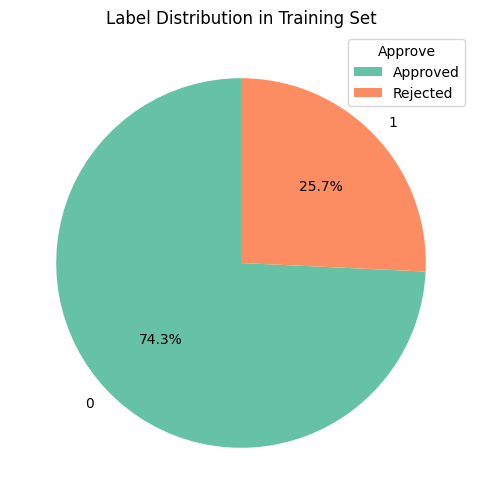

In [57]:
# Pie chart for target distribution
plt.figure(figsize=(8, 6))
Y_train.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Label Distribution in Training Set')
plt.ylabel('')
plt.legend(title='Approve', labels=['Approved', 'Rejected'], loc='upper right')
plt.show()

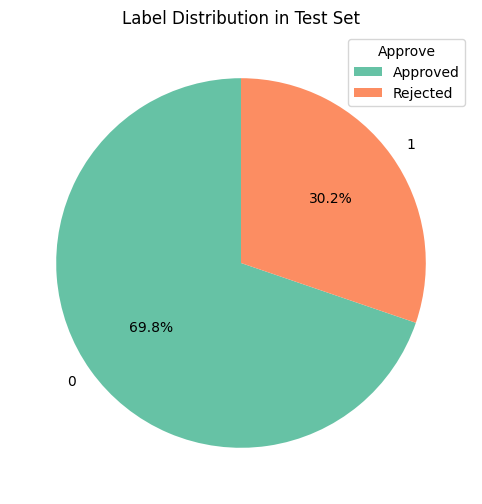

In [58]:
# Pie chart for target distribution
plt.figure(figsize=(8, 6))
Y_test.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Label Distribution in Test Set')
plt.ylabel('')
plt.legend(title='Approve', labels=['Approved', 'Rejected'], loc='upper right')
plt.show()

In [ ]:
class Predictor:
    def __init__(self, X_train, X_test, Y_train, Y_test):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test

        self.configs = {
            'random_forest': {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None},
            'xgboost': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
            'lightgbm': {'n_estimators': 100, 'learning_rate': 0.1, 'num_leaves': 31},
            'catboost': {'iterations': 100, 'learning_rate': 0.1, 'depth': 6}
        }

        self.param_grids = {
            'random_forest': {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None] + list(range(1, 21))},
            'xgboost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': list(range(3, 10))},
            'lightgbm': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 63]},
            'catboost': {'iterations': [50, 100], 'learning_rate': [0.01, 0.1], 'depth': list(range(3, 10))}
        }
        
    def create_model(self, model_name):
        if model_name not in self.configs:
            raise ValueError(f"Model {model_name} is not defined in configs.")
        try:
            model_class = {
                'random_forest': RandomForestClassifier,
                'xgboost': xgb.XGBClassifier,
                'lightgbm': lgb.LGBMClassifier,
                'catboost': cb.CatBoostClassifier
            }[model_name]
            return model_class(**self.configs[model_name])
        except KeyError:
            raise ValueError(f"Model {model_name} is not recognized.")

    def run_model(self, model_name, threshold=False):
        best_threshold = 0.5
        best_f1 = 0.0
        Y_pred = None
        model = self.create_model(model_name)
        model.fit(self.X_train, self.Y_train)
        if threshold is False:
            Y_pred = model.predict(self.X_test)
        else:
            for threshold in np.arange(0.1, 1.0, 0.1):
                probs = model.predict_proba(self.X_test)[:, 1]
                Y_pred_tmp = (probs >= threshold).astype(int)
                f1 = f1_score(self.Y_test, Y_pred_tmp)
                print(f"F1 score for threshold {threshold}: {f1}")
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = threshold
                    Y_pred = Y_pred_tmp
            print(f"Best threshold for {model_name}: {best_threshold} with F1 score: {best_f1}")

        tn, fp, fn, tp = confusion_matrix(self.Y_test, Y_pred).ravel()
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

        print(f"Model: {model_name}")
        print('Config:', self.configs[model_name])
        print('Accuracy:', accuracy_score(self.Y_test, Y_pred))
        print('F1 score:', f1_score(self.Y_test, Y_pred))
        print('FNR:', fnr)
        
        # Confusion matrix plot
        cm = confusion_matrix(self.Y_test, Y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        

    def update_config(self, model_name, new_config):
        if model_name in self.configs:
            self.configs[model_name] = {**self.configs[model_name], **new_config}
        return self.create_model(model_name)
    
    def random_search(self, model_name, cv=2, scoring='f1', verbose=1, n_iter=25, random_state=42):
        if model_name not in self.configs:
                raise ValueError(f"Model '{model_name}' not recognized. Available models: {list(self.configs.keys())}")
    
        model = self.create_model(model_name)
        if model is None:
            raise ValueError(f"Model '{model_name}' not found in the class instance.")
    
        param_distributions = self.param_grids.get(model_name, None)
        if param_distributions is None:
            raise ValueError(f"No parameter grid defined for model '{model_name}'.")
    
        randomized_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_distributions,
            n_iter=n_iter,
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            verbose=verbose,
            random_state=random_state
        )
    
        print(f"Starting Randomized Search for model '{model_name}'...")
        randomized_search.fit(self.X_train, self.Y_train)
    
        best_params = randomized_search.best_params_
        best_score = randomized_search.best_score_
    
        print(f"Best Parameters for {model_name}: {best_params}")
        print(f"Best Cross-Validation {scoring}: {best_score:.4f}")

        return self.update_config(model_name, best_params)

In [60]:
predictor = Predictor(X_train, X_test, Y_train, Y_test)

Starting Randomized Search for model 'random_forest'...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters for random_forest: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}
Best Cross-Validation f1: 0.7434
F1 score for threshold 0.1: 0.7599118295371051
F1 score for threshold 0.2: 0.7693178433124814
F1 score for threshold 0.30000000000000004: 0.8164336223722523
F1 score for threshold 0.4: 0.8453726508991531
F1 score for threshold 0.5: 0.8560875224258627
F1 score for threshold 0.6: 0.8488141181760276
F1 score for threshold 0.7000000000000001: 0.7694553820289343
F1 score for threshold 0.8: 0.7338082599990687
F1 score for threshold 0.9: 0.6954146341463414
Best threshold for random_forest: 0.5 with F1 score: 0.8560875224258627
Model: random_forest
Config: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10, 'class_weight': {0: 3, 1: 7}}
Accuracy: 0.9048029040815376
F1 score: 0.8560875224258627
FNR: 0.06378395014234053


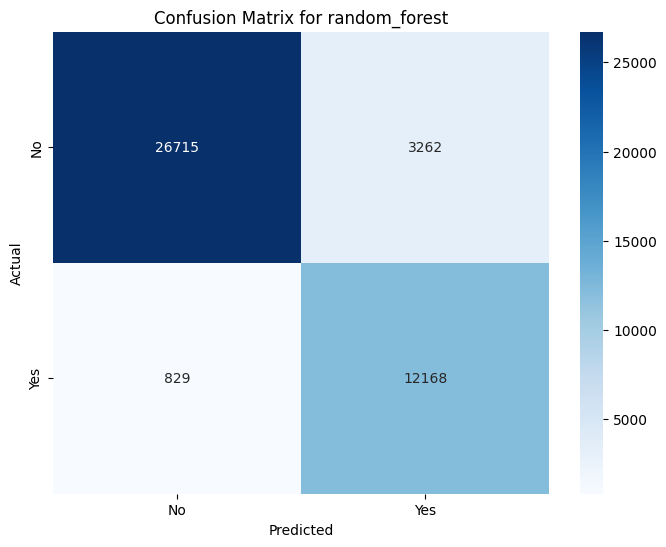

In [61]:
predictor.update_config('random_forest', {'class_weight': {0:3, 1: 7}})
predictor.random_search('random_forest')
predictor.run_model('random_forest', True)

Starting Randomized Search for model 'xgboost'...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters for xgboost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}
Best Cross-Validation f1: 0.7484
F1 score for threshold 0.1: 0.7614727540500736
F1 score for threshold 0.2: 0.7803089972735535
F1 score for threshold 0.30000000000000004: 0.8158080451658434
F1 score for threshold 0.4: 0.8338255762637065
F1 score for threshold 0.5: 0.8470138692329465
F1 score for threshold 0.6: 0.8494933806671104
F1 score for threshold 0.7000000000000001: 0.8151290774464679
F1 score for threshold 0.8: 0.7439311594202899
F1 score for threshold 0.9: 0.706052150485904
Best threshold for xgboost: 0.6 with F1 score: 0.8494933806671104
Model: xgboost
Config: {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 3, 'scale_pos_weight': 2.3333333333333335}
Accuracy: 0.9052915716479732
F1 score: 0.8494933806671104
FNR: 0.11625759790720935


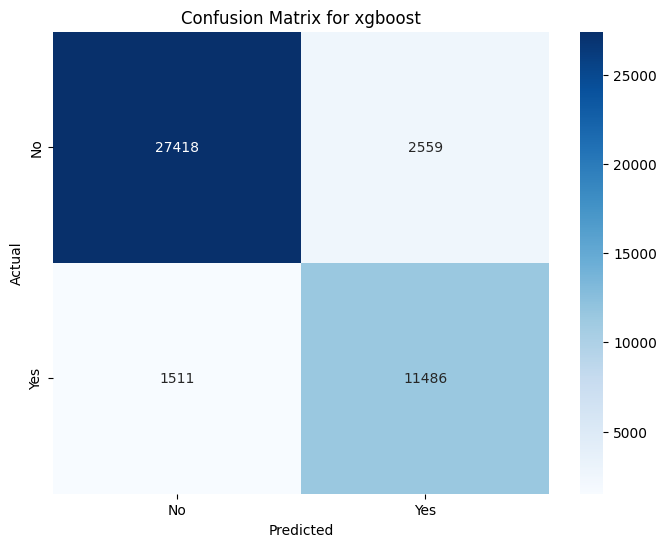

In [62]:
predictor.update_config('xgboost', {'scale_pos_weight': 7/3})
predictor.random_search('xgboost')
predictor.run_model('xgboost', True)

Starting Randomized Search for model 'lightgbm'...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 161586, number of negative: 466174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 627760, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257401 -> initscore=-1.059521
[LightGBM] [Info] Start training from score -1.059521
Best Parameters for lightgbm: {'num_leaves': 31, 'n_estimators': 100, 'learning_rate': 0.1}
Best Cross-Validation f1: 0.7466
[LightGBM] [Info] Number of positive: 161586, number of negative: 466174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033470 seconds.
You can set `force_row_wi

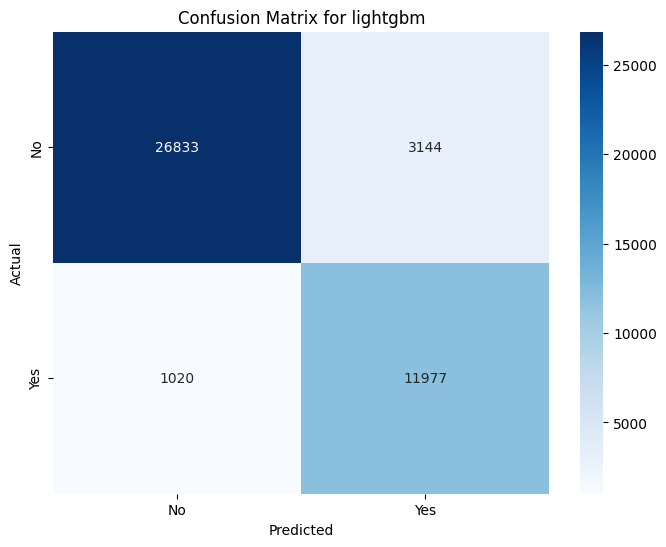

In [63]:
predictor.update_config('lightgbm', {'scale_pos_weight': 7/3})
predictor.random_search('lightgbm')
predictor.run_model('lightgbm', True)

Starting Randomized Search for model 'catboost'...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
0:	learn: 0.6791503	total: 180ms	remaining: 8.84s
1:	learn: 0.6655018	total: 229ms	remaining: 5.5s
2:	learn: 0.6522950	total: 274ms	remaining: 4.29s
3:	learn: 0.6395153	total: 317ms	remaining: 3.65s
4:	learn: 0.6271796	total: 364ms	remaining: 3.28s
5:	learn: 0.6151949	total: 412ms	remaining: 3.02s
6:	learn: 0.6035991	total: 458ms	remaining: 2.81s
7:	learn: 0.5923495	total: 509ms	remaining: 2.67s
8:	learn: 0.5815042	total: 558ms	remaining: 2.54s
9:	learn: 0.5710175	total: 613ms	remaining: 2.45s
10:	learn: 0.5607993	total: 675ms	remaining: 2.39s
11:	learn: 0.5508999	total: 727ms	remaining: 2.3s
12:	learn: 0.5413862	total: 785ms	remaining: 2.23s
13:	learn: 0.5321593	total: 840ms	remaining: 2.16s
14:	learn: 0.5232648	total: 895ms	remaining: 2.09s
15:	learn: 0.5146147	total: 951ms	remaining: 2.02s
16:	learn: 0.5063101	total: 1s	remaining: 1.95s
17:	learn: 0.4982181	total: 1.06s	re

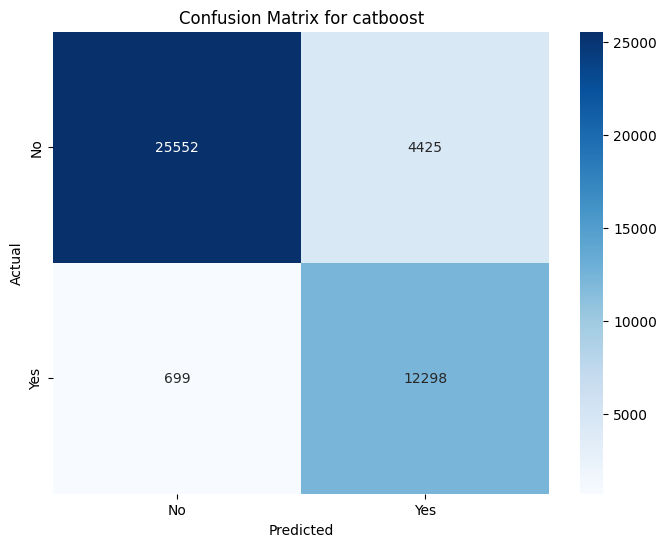

In [64]:
predictor.update_config('catboost', {'scale_pos_weight': 7/3})
predictor.random_search('catboost')
predictor.run_model('catboost', True)